

# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB-movies dataset is good dataset for analyzing movies from different dimensions:
**with a cinematic dimension:
using columns that views 



cast names 
director name
production company name 
movie genre 

**and also discuss the movies from a financial dimension:
using the columns that views 


budget 
revenue 
 
**I can find answers using the dataset for these questions :

what are the most movies generated revenues throgh years ?
what genres have high popularity through years ?
what are the most genres that made high net profit ?
what are the most movies used high budget ?
what are the most factors affect popularity ?
does movie profits change through years ?
what are the movies with a high net loss ?





**I will look for these questions in the exploratory data analysis section to extract information 

what genres have high popularity through years ?
what are the most genres that made a high net profit ?
what are the most factors affect popularity ?
does movie profits change through years ?











In [2]:
###Loading used libraryies:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#Create a dataset :
data=pd.read_csv(r"tmdb-movies.csv")
data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#columns data types:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# a breif describtion of the dataset values:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


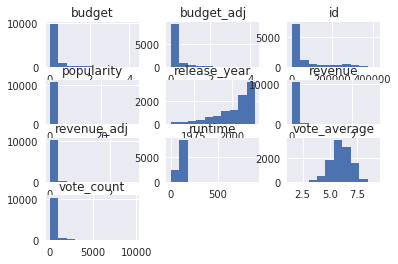

In [7]:
data.hist();

In [8]:
#the dimensions of the dataset 
data.shape



(10866, 21)


### Data Cleaning (making the data more readable ... )

In [9]:
#dropping unnecessary columns:
columns_to_drop=['id','imdb_id','budget','revenue','homepage','tagline','keywords','overview']

data.drop(columns_to_drop,axis=1,inplace=True)


In [10]:
data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
#converting a column to a date-time type :
data['release_date']=pd.to_datetime(data['release_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [12]:
#splitting the combined genres:
data['genres']=data['genres'].str.split('|')


data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
##viewing only the main genre of each movie:
data['genres']=data['genres'].str[0]
data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
##viewing only the main actor of the movieL:
data['cast']=data['cast'].str[0]
data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,C,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,T,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,S,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,H,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,V,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#viewing only the main production company:
data['production_companies']=data['production_companies'].str.split('|')
data['production_companies']=data['production_companies'].str[0]
data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,C,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,T,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,S,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,H,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,V,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
#Searching for any duplicated data  
data[data.duplicated()==True]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,J,Dwight H. Little,92,Crime,Namco,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [17]:
#dropping duplicated values 
data.drop_duplicates(inplace=True)


#making sure that there isn't any duplicated values anymore 
data.duplicated().any()


False

In [18]:
#searching for null vallues :
data.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
#dropping null values 
data.dropna(axis=0,inplace=True)

#dropping the rows that contain many zeros 
data=data[data['revenue_adj']!=0]
data=data[data['budget_adj']!=0]


''' I choosed to drop rows that contains zeros in most of columns as this will give a lot of accuracy for the dataset '''

' I choosed to drop rows that contains zeros in most of columns as this will give a lot of accuracy for the dataset '

In [20]:
data.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# <a id='eda'></a>
# Exploratory Data Analysis



# ## what Genres have the most popularity through years ?

In [21]:
data.genres.value_counts()

Drama              876
Comedy             775
Action             684
Adventure          312
Horror             272
Crime              171
Thriller           160
Fantasy            109
Animation          101
Science Fiction     98
Romance             65
Family              40
Mystery             36
Music               29
Documentary         23
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

# What are the most genres that made a net profit??




In [22]:
data['net_profit']=data['revenue_adj']-data['budget_adj']
data.head().T

,0,1,2,3,4
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,C,T,S,H,V
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
runtime,124,120,119,136,137
genres,Action,Action,Adventure,Action,Action
production_companies,Universal Studios,Village Roadshow Pictures,Summit Entertainment,Lucasfilm,Universal Pictures
release_date,2015-06-09 00:00:00,2015-05-13 00:00:00,2015-03-18 00:00:00,2015-12-15 00:00:00,2015-04-01 00:00:00
vote_count,5562,6185,2480,5292,2947
vote_average,6.5,7.1,6.3,7.5,7.3


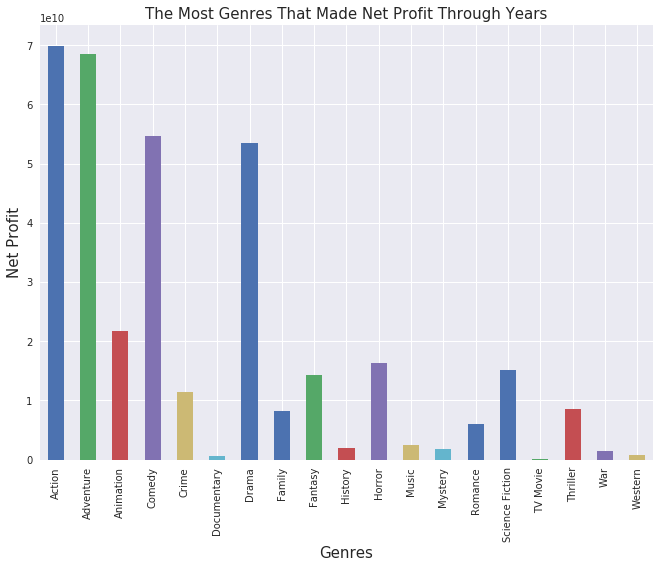

In [23]:
plots=data.groupby('genres')['net_profit'].sum()
plots.plot(kind='bar',figsize=(11,8))
plt.xlabel('Genres',size=15)
plt.ylabel('Net Profit',size=15)
plt.title('The Most Genres That Made Net Profit Through Years',size=15)
plt.show()

In [88]:
"""  There's a high correlation between net profit and Action , Adventure Movies """

"  There's a high correlation between net profit and Action , Adventure Movies "

### what are factors make a movie have a good popularity

In [24]:
data.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
popularity,1.000000,0.213690,0.779125,0.319927,0.175991,0.395330,0.544761,0.515125
runtime,0.213690,1.000000,0.273464,0.359173,-0.113488,0.333453,0.279733,0.234491
vote_count,0.779125,0.273464,1.000000,0.389853,0.209688,0.495209,0.653202,0.612792
vote_average,0.319927,0.359173,0.389853,1.000000,-0.135646,0.035798,0.268227,0.290195
release_year,0.175991,-0.113488,0.209688,-0.135646,1.000000,0.078378,-0.101931,-0.131448
budget_adj,0.395330,0.333453,0.495209,0.035798,0.078378,1.000000,0.567983,0.401797
revenue_adj,0.544761,0.279733,0.653202,0.268227,-0.101931,0.567983,1.000000,0.981896
net_profit,0.515125,0.234491,0.612792,0.290195,-0.131448,0.401797,0.981896,1.000000


### The Relationship between the profits & years ?

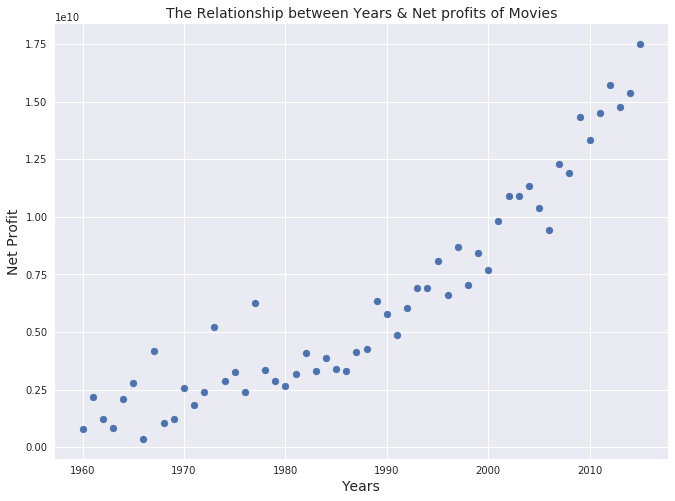

In [25]:
x=sorted(data['release_year'].unique())


y=data.groupby('release_year')['net_profit'].sum()
plt.figure(figsize=(11,8))
plt.scatter(x,y)
plt.xlabel('Years',size=14)
plt.ylabel('Net Profit',size=14)
plt.title('The Relationship between Years & Net profits of Movies',size=14)

plt.show()

In [ ]:
""" The plot shows a positive relationship between net profits of movies """

"""Production companys know how to making more profits through years """

## Limitations :
### The data has so many null variables in the financial columns (budget_adj//revenue_adj)
### I removed them to make my data more insightful for predictions 
### categorical variables wasnt that clean ,, but i extracted only the main categories

<a id='conclusions'></a>
## Conclusions
1- The most genres that have great popularity are :
Drama ,Comdey , Action,Adventure ,Horror

2-most genres that make net profits?
Action , Adventures

3- What factors that highly correlated to the high profit :
popularity  , vote_count , budget , revenue

4- There is a good positive relationship between years and net profits



In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0